In [231]:
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import h5py
import seaborn as sns

from queso.io import IO
from queso.utils import shots_to_counts

colors = sns.color_palette("deep", 14) #as_cmap=True)
ls_kwargs = dict(ls="-", alpha=0.9, lw=2)
figsize = (5, 3)

In [232]:
n = 6
k = 6

# io = IO(folder=f"2023-06-13_nn-estimator-n{n}-k{k}")
io = IO(folder=f"2023-06-07_nn-estimator-n{n}-k{k}")


In [233]:
# import data
hf = h5py.File(io.path.joinpath("circ.h5"), 'r')
shots = jnp.array(hf.get('shots'))
# probs = jnp.array(hf.get('probs'))
phis = jnp.array(hf.get('phis'))
fi = jnp.array(hf.get('fi'))
vn_ent = jnp.array(hf.get('vn_ent'))
hf.close()

# hf = h5py.File(io.path.joinpath("nn.h5"), 'r')
# nn_mse = jnp.array(hf.get('nn_mse'))
# pred = jnp.array(hf.get('pred'))
# hf.close()

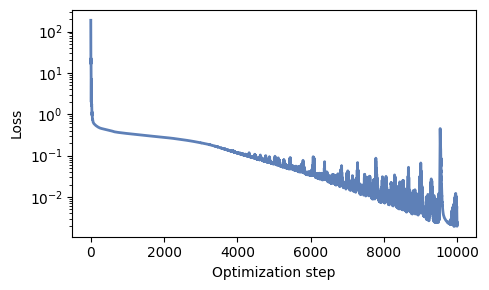

13/06/2023, 13:32:14 | Saved figure to /Users/benjamin/Library/CloudStorage/OneDrive-UniversityofWaterloo/Desktop/1 - Projects/Quantum Intelligence Lab/queso/data/2023-06-13_nn-estimator-n4-k4/loss-log.png successfully.


In [195]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(nn_mse, label="MSE", color=colors[0], **ls_kwargs)
ax.set(xlabel="Optimization step", ylabel="Loss", yscale="log")
fig.tight_layout()
plt.show()
# io.save_figure(fig, filename="loss-log.png")

07/06/2023, 21:57:30 | Saved figure to /Users/benjamin/Library/CloudStorage/OneDrive-UniversityofWaterloo/Desktop/1 - Projects/Quantum Intelligence Lab/queso/data/2023-06-07_nn-estimator-n6-k6/true-phi-vs-estimate.png successfully.


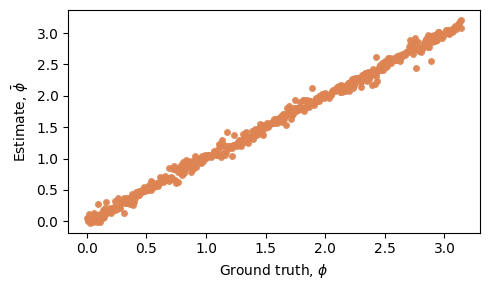

In [186]:
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(phis, pred, color=colors[1], marker=".", **ls_kwargs)
ax.set(xlabel=r"Ground truth, $\phi$", ylabel=r"Estimate, $\bar{\phi}$")
fig.tight_layout()
io.save_figure(fig, filename="true-phi-vs-estimate.png")

07/06/2023, 21:57:32 | Saved figure to /Users/benjamin/Library/CloudStorage/OneDrive-UniversityofWaterloo/Desktop/1 - Projects/Quantum Intelligence Lab/queso/data/2023-06-07_nn-estimator-n6-k6/fi-entropy-circuit successfully.


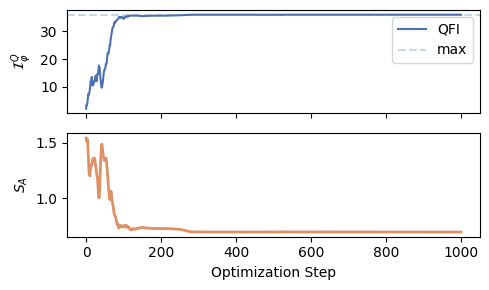

In [187]:
fig, axs = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=figsize)
axs[0].plot(fi, color=colors[0], label="QFI")
axs[0].axhline(n**2, color=colors[0], label="max", alpha=0.3, ls='--')
axs[0].legend()
axs[0].set(ylabel=r"$\mathcal{I}_{\varphi}^{Q}$")
axs[1].plot(vn_ent, color=colors[1], **ls_kwargs)
axs[1].set(ylabel="$S_A$", xlabel="Optimization Step")
fig.tight_layout()
io.save_figure(fig, filename="fi-entropy-circuit")

In [234]:
counts = shots_to_counts(shots, phis)

In [235]:
counts.shape

(500, 64)

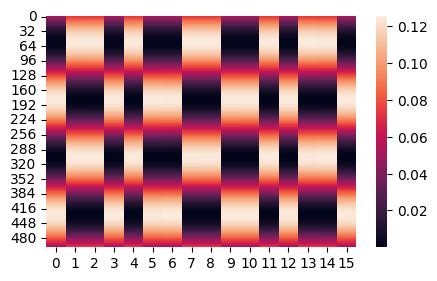

In [197]:
fig, ax = plt.subplots(figsize=figsize)
sns.heatmap(probs, vmin=None, vmax=None, cmap=None)
# ax.set(xlabel="Optimization step", ylabel="Loss", yscale="log")
# fig.tight_layout()
plt.show()


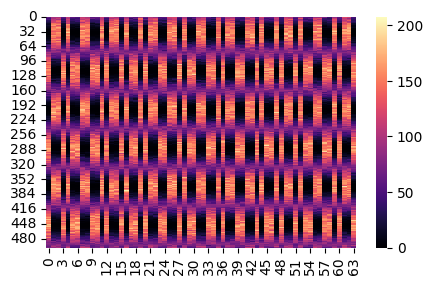

In [236]:
fig, ax = plt.subplots(figsize=figsize)
sns.heatmap(counts, vmin=None, vmax=None, cmap=sns.color_palette('magma', as_cmap=True))
# ax.set(xlabel="Optimization step", ylabel="Loss", yscale="log")
# fig.tight_layout()
plt.show()

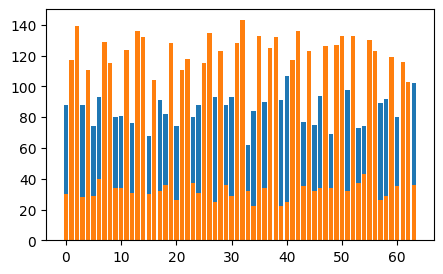

In [241]:
fig, ax = plt.subplots(figsize=figsize)
t = 10
ax.bar(jnp.arange(counts.shape[1]), counts[-t, :])
ax.bar(jnp.arange(counts.shape[1]), counts[t, :])
plt.show()